# ЗАНЯТИЕ 9. SQL ­– язык для работы с базами данных (на примере SQLite)[1]

[1] <span>&#9757;&#128578;</span> Данное занятие разработано на основе документации `SQLite Python` [18].

## Цели занятия

Получение представления о языке `SQL` на примере работы с СУБД `SQLite`. Изучение основных принципов практической работы с базами данных как с одним из возможных типов источников получения информации (в том числе для расчета бизнес–метрик).

## Порядок выполнения работы

### Введение

Исходные данные, которые предоставляются аналитику данных для анализа, часто имеют специфический формат, который влияет как на процесс чтения этих данных, так и определяет доступный функционал для их обработки и устанавливает ограничения как на этот функционал, так и на сами данные.

Например, мы уже рассматривали работу с `CSV` файлами (данные, разделенные запятыми), этот формат не дает нам никакого удобного функционала для работы с этими данными, но зато он очень простой.

База данных – совокупность данных, хранимых в соответствии со схемой данных, манипулирование которыми выполняют при помощи готового инструмента – системы управления базой данных (СУБД).

Для взаимодействия с базой данных очень часто используется язык `SQL` (англ. structured query language — «язык структурированных запросов») – декларативный язык программирования, применяемый для создания, модификации и управления данными в реляционной базе данных. Реляционная база данных – это набор данных с предопределенными связями между ними.

Используя средства СУБД, вы можете обрабатывать данные без отдельных языков программирования. Например, в данном модуле будут рассмотрено использование СУБД для вычисления различных метрик данных.

Метрики данных­– это количественные показатели чего–либо, например:

-   В бизнес аналитике метриками могут быть число активных покупателей или пользователей, отток клиентов;

-   В машинном обучении метриками может быть точность, с которой модель обрабатывает данные, или метрика «скорость» ­– как быстро происходит процесс обучения модели;

-   И многие другие метрики, которые интересны заказчику или исполнителю.

Если метрика наиболее точно описывает качество протекающих процессов, то такую метрику называют ключевой.

На данном занятии на примере взаимодействия с базой данных будут рассмотрены некоторые простые метрики на примере набора данных по продажам автомобилей.

Довольно часто аналитика данных ведется либо только с использованием языка `SQL`, либо совместно с другим языком программирования. Например, как в данном случае – с языком `Python`. Обычно при помощи одного лишь `SQL` сложные алгоритмы не реализуют ­– это либо громоздко, либо работает медленно.

### SQLite

`SQLite` – компактная встраиваемая система управления базами данных (СУБД), где база данных представляет собой простой файл. В документации это называется автономной, бессерверной, не требующей конфигурации и транзакционной СУБД `SQL`.

`SQLite` довольно проста и легковесна, поэтому даже поставляется как стандартная библиотека совместно с языком `Python3`.

Подключим библиотеку `sqlite3` к нашему коду, и посмотрим какую версию данной библиотеки мы имеем:

In [1]:
import sqlite3  
print('Версия библиотеки sqlite3:',sqlite3.version)  

Версия библиотеки sqlite3: 2.6.0


Теперь мы можем создать базу данных и соединится к ней. Эти два действия делаются одной функцией `sqlite3.connect()`. То есть, если база данных с указанным именем уже существует, то мы просто откроем её. А если не существует – она автоматически будет создана и открыта.

In [2]:
connection = None  
connection = sqlite3.connect('./test.db')  

Как нам понять, что база данных успешно создалась? Просто посмотрим какие у нас файлы здесь есть. Для этого существует встроенная в `Linux` системная утилита `ls` или в `Windows – dir`. В списке файлов вы должны увидеть появившийся `test.db`, т.е. файл базы данных:

In [3]:
import platform

if platform.system()=='Windows':
    !dir ".\\"
if platform.system()=='Linux':
    !ls "./"

 Том в устройстве C не имеет метки.
 Серийный номер тома: F4E0-A256

 Содержимое папки C:\Users\pavel\Desktop\Python для аналитики данных (блокноты)\МОДУЛЬ 4. Введение в SQL и метрики данных\ЗАНЯТИЕ 9. SQL - язык для работы с базами данных (на примере SQLite)

28.01.2022  00:44    <DIR>          .
27.01.2022  09:10    <DIR>          ..
27.01.2022  23:43    <DIR>          .ipynb_checkpoints
28.01.2022  00:42            53 386 Chrysanthemum50.jpg
27.01.2022  23:43    <DIR>          media
28.01.2022  00:44                 0 test.db
27.01.2022  23:42            90 599 ЗАНЯТИЕ 9.docx
28.01.2022  00:43           824 511 ЗАНЯТИЕ 9.html
28.01.2022  00:43           217 276 ЗАНЯТИЕ 9.ipynb
               5 файлов      1 185 772 байт
               4 папок  79 156 097 024 байт свободно


Знак «`!`» перед командой означает, что это не `Python` код, а код, который выполнится в системной оболочке. Это относится к понятию «магия» интерактивного интерпретатора, которое уже упоминалось ранее (см. сноску в Занятии 7 в разделе «Вывод графиков при помощи библиотеки matplotlib (и plotly)»).

При помощи восклицательного знака будет осуществлён запуск системной утилиты `ls` или `dir` (в зависимости от типа платформы, которую вы используете). При этом утилите будет передан параметр, в данном случае ­– это путь к папке, содержимое которой мы хотим вывести. В данном случае этот путь – это текущий каталог («`"./"`» для `Linux` или «`".\\"`» для `Windows`, где у `Windows` из–за использования в структуре файловой системы обратных слешей обратный слеш экранирован при помощи второго обратного слеша). Текущий путь можно было и не указывать в виде параметра – эти утилиты и так по умолчанию выполняются для текущего каталога.

Если бы мы хотели указать иной каталог, например возврат на 2 уровня наверх, то написали бы «`"./../../"`» или «`".\\..\\..\\"`». Или просто «`"../../"`» и «`..\\..\\`». Так же можно можно указывать не относительные, а абсолютные пути.

В данном случае вы могли посмотреть создался ли файл `test.db` и через обычный графический проводник, или же при помощи проводника `JupytherLab` (но в нем файл может появится с задержкой, возможно потребуется вручную обновить список файлов). Вы можете проверить успешное создание файла базы данных любым удобным вам способом.

#### Выполнение запросов к БД

Вернемся к теме занятия. Если файл `test.db` появился в файловой системе, значит файл базы данных (БД) успешно создался.

Наш `Python` интерпретатор все ещё работает. База данных не просто была создана, но мы к ней подключены и можем пользоваться ей. Давайте мы выполним запрос к СУБД, чтобы она вывела свою версию:

In [4]:
cursor = connection.cursor() #любое взаимоедействие с БД происходит через указатель на нее (курсор)
cursor.execute('SELECT SQLITE_VERSION()') #вот так можно делать запросы к базе данных
data = cursor.fetchall()[0] #при помощи метода fetchall() мы получаем ответ на сделанный запрос.
                            #Запишем его в переменную data
print ("SQLite version: {}".format(data)) #при помощи функции print() выведем произвольный текст
                                     #и при помощи метода .format() вставим в {} нужную переменную

SQLite version: ('3.37.0',)


В коде выше мы вывели не версию `Python` пакета–«обёртки» `SQLite`, а версию самой СУБД, которая она хранит в служебной таблице «рядом» с «основными» данными. Тем же способом, сделав `SELECT` запрос мы можем получать и те данные, что, собственно, и хранятся в таблице. Например, это могла бы быть стоимость одной из существующих машин в базе данных.

Так как созданная база данных пустая и в ней пока ничего нет, кроме служебных полей (например, полученной ранее версии), то заполним базу информацией. Пусть это будет информация о марках машин и их стоимости (описание данного кода будет представлено далее):

In [5]:
cursor.execute("CREATE TABLE if not exists cars (id INT, name TEXT, price INT)")  

cursor.execute("INSERT INTO cars VALUES(1,'Audi',52642)")  
cursor.execute("INSERT INTO cars VALUES(2,'Mercedes',57127)")  
cursor.execute("INSERT INTO cars VALUES(3,'Skoda',9000)")  
cursor.execute("INSERT INTO cars VALUES(4,'Volvo',29000)")  
cursor.execute("INSERT INTO cars VALUES(5,'Bentley',350000)")  
cursor.execute("INSERT INTO cars VALUES(6,'Citroen',21000)")  
cursor.execute("INSERT INTO cars VALUES(7,'Hummer',41400)")  
cursor.execute("INSERT INTO cars VALUES(8,'Volkswagen',21600)")  

#### Курсор в БД

Как представлено выше, запросы выполняются через метод `cursor.execute()`, которому передаем текстовый запрос на языке `SQL`.

Курсор – это именованная область памяти, содержащая результирующий набор запроса. В `SQLite` все манипуляции производятся через курсор. Курсор – это объект, позволяющий по отдельности обрабатывать строки из результирующего набора, возвращенного оператором `SELECT`.

#### Оператор CREATE TABLE и таблицы в БД

Первой строчкой мы создали таблицу `cars` (при помощи оператора `CREATE TABLE`), состоящей из трех полей:

-   `id` – уникальный номер, целочисленный тип `INT`;

-   `name` – марка машины, текстовый тип `TEXT`;

-   `price` – стоимость машины, целочисленный тип `INT`.

При этом при создании таблицы мы указали ключевое слово «`if not exists`», это означает, что таблица будет создана при условии её отсутствия. Наша данных была пустой, поэтому таблица `cars` будет создана и условие «`if not exists`» было указано только для расширения «кругозора» обучающегося.

Таблицы – это и есть объекты, которые хранят все данные в базах данных. Обычно данные разделяются по таблицам, и указывается связь полей одних таблиц с полями других таблиц.

Например, можно создать таблицу «`заказ`», которая будет связана по ключевым полям (которые указаны как внешний ключ) с таблицей «`товары`», и при этом в каждой новой записи в таблице «`заказ`» не потребуется хранить информацию о всех возможных «`товарах`», а будет хранится только `id` тех товаров, которые действительно указаны в этом заказе.

Бывает так, что объем хранимой в БД информации очень большой, или же бывает необходимо увеличить скорость работы СУБД, поэтому БД бывают распределенные, т.е. когда таблицы логически единой БД хранятся на разных серверах/файлах.

Например, шардинг (от англ. shard, термин без дословного перевода) – это метод разделения и хранения единого логического набора данных в виде множества баз данных (используется как один из способ горизонтального масштабирования БД).

#### Оператор INSERT

Вернемся к примеру кода, представленному ранее. После создания таблицы, выполняется ряд запросов, содержащих оператор `INSERT`, который в таблицу `cars` записывает несколько записей, каждая из которых содержит три значения: уникальный номер, марка машины и стоимость машины. Тем самым мы наполнили таблицу некоторым количеством данных.

Давайте сделаем запрос всех данных из таблицы `cars:`

In [6]:
cursor.execute('SELECT * FROM cars')
data = cursor.fetchall()
print (data)

[(1, 'Audi', 52642), (2, 'Mercedes', 57127), (3, 'Skoda', 9000), (4, 'Volvo', 29000), (5, 'Bentley', 350000), (6, 'Citroen', 21000), (7, 'Hummer', 41400), (8, 'Volkswagen', 21600)]


Все данные из таблицы мы записали в переменную `data` и выше видно, что они действительно корректно выводятся. Переменная `data` теперь хранит записи (строки) таблицы, но не имена её полей (имена колонок). Поэтому для обращения к данным необходимо указывать индексы. В примере ниже продемонстрированно, что с индексами вывод элемента работает, а с ключами – нет:

In [7]:
print(data[0][1]) # сработает  
print(data[0]["name"]) # выведет ошибку  

Audi


TypeError: tuple indices must be integers or slices, not str

В выводимой ошибке сообщено, что `data` – это кортеж. А как уже было рассмотрено, у кортежей есть только индексы, и нет ключей как у словарей.

#### Создание именованного датафрейма из таблицы SQLite

Через функцию `print()` неудобно воспринимать содержимое таблицы данных. Давайте воспользуемся представлением данных, которое нам дает библиотека `pandas` – а именно структура `DataFrame`, которую мы изучали ранее и которая является двухмерной маркированной структурой. Т.е. `DataFrame` идеально подходит для представления и манипуляции табличными данными.

Для начала, вспомним о структурах хранения данных в `Pandas`. Основными являются `Series` и `DataFrame`.

`Series` – это проиндексированный одномерный массив значений. Он похож на простой словарь типа `dict`, где имя элемента будет соответствовать индексу, а значение – значению записи.

`DataFrame` — это проиндексированный многомерный массив значений, соответственно каждый столбец `DataFrame`, является структурой `Series`.

##### Первый способ создания датафрейма из таблицы

В коде ниже создается `DataFrame` с именем `df`, у которого в качестве строк – строки из переменной `data`, а в качестве имен столбцов устанавливаются имена из переменной `column_names` (откуда она появляется рассмотрим после кода). Импортируем модуль `pandas` и создадим структуру `DataFrame`, заполненную данными из таблицы `cars`.

In [8]:
import pandas as pd

#получение имени столбцов из описания курсора
column_names=[]
print (cursor.description)
for row in cursor.description:
    column_names.append(row[0])

df = pd.DataFrame(data, columns=column_names) #в качестве исходных данных берем полученную ранее data
                                        #проставим имена колонок, хранящиеся в массиве column_names
print (df['name'][0])
df

(('id', None, None, None, None, None, None), ('name', None, None, None, None, None, None), ('price', None, None, None, None, None, None))
Audi


,id,name,price
0,1,Audi,52642
1,2,Mercedes,57127
2,3,Skoda,9000
3,4,Volvo,29000
4,5,Bentley,350000
5,6,Citroen,21000
6,7,Hummer,41400
7,8,Volkswagen,21600


Таблица 1. Содержимое таблицы `cars`

Тут имена столбцов мы получили из `cursor.description` (т.е. из описания курсора), который хранит метаинформацию из последнего выполненного запроса `cursor.execute()`. В данном случае мы видим, что в описании курсора есть имена колонок, поэтому мы «переписали» их в переменную `column_names`, которую дальше указали как имена колонок `pandas` датафрейма.

В представленном ранее примере продемонстрировано, что теперь, используя «`df['name'][0]`», мы можем обращаться к полю столбца `name` нулевой строчки.

Если бы мы не устанавливали имена столбцов, то пришлось бы использовать «`df[1][0]`» для вывода этого же поля (если хотите попробовать, удалите «`columns=column_names`» и вместо «`print (df['name'][0])`» напишите «`print (df[1][0])`»).

##### Второй способ создания датафрейма из таблицы

Так же имена столбцов можно получить другим способо – из запроса служебной метаинформации при помощи «`PRAGMA table_info(cars)`», это продемонстрировано ниже. Итоговый датафрейм полностью аналогичен предыдущему:

In [9]:
#или можно было именя столбоцов получить из информации о таблице
cursor.execute('PRAGMA table_info(cars)')
names = cursor.fetchall()
column_names=[]
for index in enumerate(names):
    column_names.append(index[1][1])

df = pd.DataFrame(data, columns=column_names)
df

,id,name,price
0,1,Audi,52642
1,2,Mercedes,57127
2,3,Skoda,9000
3,4,Volvo,29000
4,5,Bentley,350000
5,6,Citroen,21000
6,7,Hummer,41400
7,8,Volkswagen,21600


##### Третий способ создания датафрейма из таблицы

Как можно было понять из проделанного, выше курсор по умолчанию возвращает данные в виде кортежа кортежей. Мы можем переключить курсор на иной режим работы, т.е. режим – когда вместо кортежей он будет возвращать словари.

У кортежей есть только индексы, а у словарей индексами может быть не только число, но и текстовый ключ. Таким образом, мы можем ссылаться на данные по их именам столбцов:

In [10]:
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute("SELECT * FROM cars")
rows = cursor.fetchall()
for row in rows:
    print ("{} {} {}".format(row[0], row[1], row[2]))
print ()
print ("Выведем 6 строку столбца name: {}".format(rows[6-1]["name"])) #-1 т.к. id не с нуля

connection.row_factory = None #вернем к курсору по умолчанию - "кортеж кортежей"
cursor = connection.cursor() #обновим курсор

1 Audi 52642
2 Mercedes 57127
3 Skoda 9000
4 Volvo 29000
5 Bentley 350000
6 Citroen 21000
7 Hummer 41400
8 Volkswagen 21600

Выведем 6 строку столбца name: Citroen


#### Аналитика данных и вычисление метрик (средствами SQL)

Выведем данные графически в виде столбиковой диаграммы при помощи библиотеки `matplotlib`.

<AxesSubplot:xlabel='name'>

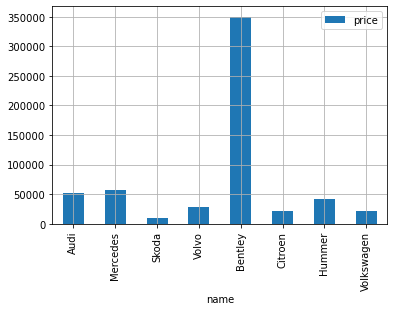

In [11]:
import matplotlib.pyplot as plt
df.plot(x='name', y='price', kind="bar", grid=True)

Рис. 1. Данные о ценах автомобилей

##### Агрегатные функции

Смотря на данные из вывода выше представленного примера, мы уже можем сделать вывод, что нас может интересовать некоторый ряд стандартных статистических метрик (например, средняя цена автомобилей). Так же в продажной сфере бывают метрики «средний чек» и многие другие, возникновение которых обусловлено бизнес–стратегией. Тем самым, что угодно можно назвать метрикой.

`SQLite` предоставляет следующие агрегатные функции языка `SQL`:

-   `AVG()` – возвращает среднее значение группы;

-   `COUNT()` – возвращает количество строк, соответствующих указанному условию;

-   `MAX()` – возвращает максимальное значение в группе;

-   `MIN()` – возвращает минимальное значение в группе;

-   `SUM()` – возвращает сумму значений;

-   `GROUP_CONCAT(выражение, разделитель)` – возвращает строку, которая представляет собой объединение всех ненулевых значений.

##### Функция GROUP_CONCAT

Рассмотрим сперва самую последнюю в представленном выше списке – функцию `GROUP_CONCAT(выражение, разделитель)`. Так как она возвращает текст, а текст вряд ли можно отнести к количественному показателю и его вряд ли можно назвать метрикой. А дальше мы будем рассматривать именно метрики.

`GROUP_CONCAT` объединяет строки и выражением в ней может быть, например, имя столбца – тогда весь текст со всех строк­ сложится и будет разделен разделителем. По умолчанию разделителем является запятая. По реальному примеру проще понять суть этой функции:

In [12]:
cursor.execute("SELECT GROUP_CONCAT(name) FROM cars;")
data = cursor.fetchone()
print ("Все доступные марки: {}".format(data[0]))

Все доступные марки: Audi,Mercedes,Skoda,Volvo,Bentley,Citroen,Hummer,Volkswagen


##### Функция MIN (метрика «самая дешевая машина»)

Ниже приведен пример использования `SQL` функции `MIN` для вычисления метрики «самая дешевая машина»:

In [13]:
cursor.execute("SELECT MIN(price) FROM cars;")
data = cursor.fetchone()
print ("Минимальная цена машины: {}".format(data[0]))

cursor.execute("SELECT name FROM cars WHERE price=(SELECT MIN(price) FROM cars);")
data = cursor.fetchone()
print ("Марка самой дешевой машины: {}".format(data[0]))

Минимальная цена машины: 9000
Марка самой дешевой машины: Skoda


##### Функция Count и оператор WHERE. Метрика «количество машин со стоимостью выше 10000» и вывод их id. Запрос фильтра метрики у пользователя

Ниже приведен пример использования `SQL` функции `Count` для вычисления метрики «количество машин со стоимостью выше 10000»:

In [14]:
cursor.execute("SELECT Count(id) FROM cars WHERE price>10000;")
data = cursor.fetchone()
print ("Сколько машин имеет стоимость выше 10000: {}".format(data[0]))

Сколько машин имеет стоимость выше 10000: 7


Ниже приведен пример запроса, который возвращает уникальный номер машин, цена которых выше 10000:

In [15]:
cursor.execute("SELECT id FROM cars WHERE price>10000 GROUP BY id;")
data = cursor.fetchall()
print(data)

print ("Машины с этим ID имеют стоимость выше 10000:")
for i in data:
    print (i[0], end=',')

[(1,), (2,), (4,), (5,), (6,), (7,), (8,)]
Машины с этим ID имеют стоимость выше 10000:
1,2,4,5,6,7,8,

Функция `input()` позволяет запросить у пользователя необходимую информацию (рассматривали её ранее). Запустите представленный ниже код и введите интересующую вас минимальную стоимость автомобилей.

In [16]:
print ("Начиная с какой стоимости вас интересуют машины?")
my_price=input()
cursor.execute(f"SELECT id FROM cars WHERE price>{my_price} GROUP BY id;")
data = cursor.fetchall()

print ("Машины с этим ID имеют стоимость выше {}:".format(my_price))
for i in data:
    print (i[0], end=',')

Начиная с какой стоимости вас интересуют машины?


 10000


Машины с этим ID имеют стоимость выше 10000:
1,2,4,5,6,7,8,

##### Работа с несколькими таблицами (агрегация данных на базе внешних ключей)

Создадим таблицу, содержащую имя покупателя и имя товара, которое он купил и в каком количестве.

In [17]:
cursor.execute (" \
CREATE TABLE if not exists orders ( \
  id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,  \
  customer_name TEXT, quantity INT, buyed_car_id INT, \
  FOREIGN KEY(buyed_car_id) REFERENCES cars (id) \
)")

В коде выше мы создали таблицу, у которой есть внешний ключ. Т.е. обратим внимание на следующую часть:

``` sql
buyed_car_id INT,FOREIGN KEY(buyed_car_id) REFERENCES cars (id)  
```

где поле `buyed_car_id` имеет целочисленный тип INT, а далее при помощи атрибута `FOREIGN KEY` указывается, что это поле (поле `buyed_car_id`) ссылается на поле `id` таблицы `cars`.

Знак «`\`» расставлен вручную и служит для переноса строк кода, чтобы сохранить его читаемость.

Именно при помощи внешних ключей и производится связь нескольких таблиц в единую схему данных. Теперь используя поле `buyed_car_id` мы имеем возможность объединять запросы в таблицах.

Например, имея таблицы `orders` (заказы) и `cars` (машины) мы можем подсчитывать сумму заказа или выводить имя машин (марку), кроме того, чтобы можем выводить какие `id` машин содержатся в заказе.

Заполним таблицу тремя заказами и посмотрим на них.

In [18]:
cursor.execute("INSERT INTO orders (customer_name, quantity, buyed_car_id) VALUES('Pavel',2,3)")
cursor.execute("INSERT INTO orders (customer_name, quantity, buyed_car_id) VALUES('Ramil',4,3)")
cursor.execute("INSERT INTO orders (customer_name, quantity, buyed_car_id) VALUES('Maryanna',1,6)")

cursor.execute("SELECT * FROM orders")
data = cursor.fetchall()
print (data)

[(1, 'Pavel', 2, 3), (2, 'Ramil', 4, 3), (3, 'Maryanna', 1, 6)]


Эти данные несут в себе «кусочек» информации, который, если дополнить данными из таблицы `cars –` то получится представленный в таблице ниже и вполне понятный набор данных (Таблица 2, как получить такую таблицу – рассмотрим позже).

Таблица 2. Развернутый смысл таблицы `orders` (заказы)

<table>
<colgroup>
<col style="width: 3%" />
<col style="width: 11%" />
<col style="width: 12%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 16%" />
<col style="width: 10%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header">
<th>
</th>
<th>

<strong>id заказа</strong>

</th>
<th>

<strong>Марка машины</strong>

</th>
<th>

<strong>Цена машины</strong>

</th>
<th>

<strong>id машины</strong>

</th>
<th>

<strong>Имя покупателя</strong>

</th>
<th>

<strong>Кол–во</strong>

</th>
<th>

<strong>id машины</strong>

</th>
<th>

<strong>Сумма заказа</strong>

</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>

<strong>0</strong>

</td>
<td>

3

</td>
<td>

Skoda

</td>
<td>

9000

</td>
<td>

1

</td>
<td>

Pavel

</td>
<td>

2

</td>
<td>

3

</td>
<td>

18000

</td>
</tr>
<tr class="even">
<td>

<strong>1</strong>

</td>
<td>

3

</td>
<td>

Skoda

</td>
<td>

9000

</td>
<td>

2

</td>
<td>

Ramil

</td>
<td>

4

</td>
<td>

3

</td>
<td>

36000

</td>
</tr>
<tr class="odd">
<td>

<strong>2</strong>

</td>
<td>

6

</td>
<td>

Citroen

</td>
<td>

21000

</td>
<td>

3

</td>
<td>

Maryanna

</td>
<td>

1

</td>
<td>

6

</td>
<td>

21000

</td>
</tr>
</tbody>
</table>

##### Оператор JOIN

Подсчитаем на какую сумму было куплено машин в рамках одного заказа средствами `Python`. Данный код содержит оператор объединения таблиц `LEFT JOIN`, который соединит таблицу `cars` с таблицей `orders` по условию соответствия `orders.buyed_car_id=cars.id` (т.е. по внешнему ключу).

Так как мы именно к `cars` присоединяем `orders`, а не наоборот, то соединение произойдет даже если заказа не существует, но в этом случае некоторые поля, например, количество машин в заказе будет пустым, т.е. `None.`

Конечно, обычно так не делают, и, например – в подобном случае к заказам присоединяют машины. Но пока будет сделано так (сделать иначе при помощи оператора `GROUP BY`).

In [19]:
cursor.execute(
    "SELECT orders.quantity,cars.name,cars.price FROM cars LEFT JOIN orders ON orders.buyed_car_id=cars.id"
)
data = cursor.fetchall()
df = pd.DataFrame(data)
print (df)
for i in data:
    print("{}:".format(i[1]), int(0 if i[0] is None else i[0]) * i[2])

     0           1       2
0  NaN        Audi   52642
1  NaN    Mercedes   57127
2  2.0       Skoda    9000
3  4.0       Skoda    9000
4  NaN       Volvo   29000
5  NaN     Bentley  350000
6  1.0     Citroen   21000
7  NaN      Hummer   41400
8  NaN  Volkswagen   21600
Audi: 0
Mercedes: 0
Skoda: 18000
Skoda: 36000
Volvo: 0
Bentley: 0
Citroen: 21000
Hummer: 0
Volkswagen: 0


В коде выше («`0 if i[0] is None else i[0]`») если первое поле записи пустое (означает сколько таких машин в этом конкретном заказе), т.е. имеет тип `None`, то значение суммы этих машин в заказе записывается нулевое, а если значение в этом поле ненулевое, то происходит умножение количества машин `i[0]` в заказе на стоимость машины `i[2]`. И так для каждой итерируемой записи `data`.

Обратите внимание на вывод кода выше – машина `Skoda` повторяется два раза. Это потому, что она есть в двух разных заказах (каждый из которых сделан разными людьми, хотя это никак не влияет). Выше представленный код не вычисляет сумму всех заказов всех пользователей, и не вычисляет полную сумму заказа одного пользователя. Он вычисляет сумму записи (строчки) в таблице заказа (а она состоит из цены машины и количества машин этой марки в текущей записи).

Т.е. известно, что в реальном мире человек может заказать разный товар одним заказом. Но в данных, записанных в таблицу, в таблице `orders` нет таких записей, в которых `id` заказа одинаков. Поэтому и в данном коде мы никак не учли, что заказ может состоять из разных товаров (или даже из двух однотипных, если их пробили отдельно по 1шт.) – это не является текущей первоочередной задачей.

Ту же самую логику, что и в примере выше, мы могли реализовать средствами `SQL`, как представлено ниже, и это выглядит даже проще (т.е. понятнее):

In [20]:
cursor.execute("SELECT name, orders.quantity*cars.price FROM cars LEFT JOIN orders ON orders.buyed_car_id=cars.id")
df = pd.DataFrame(cursor.fetchall())
print (df.fillna('вставьте 0')) #c заменой NaN/None

            0           1
0        Audi  вставьте 0
1    Mercedes  вставьте 0
2       Skoda     18000.0
3       Skoda     36000.0
4       Volvo  вставьте 0
5     Bentley  вставьте 0
6     Citroen     21000.0
7      Hummer  вставьте 0
8  Volkswagen  вставьте 0


Теперь расширим вывод. Пусть кроме произведения `orders.quantity*cars.price` так же выводится все, что только возможно. Для этого после `SELECT` укажем символ «`*`», который укажет, что необходимо вывести все доступные поля. Так же мы укажем «`WHERE orders.quantity*my_cars.price not null`», чтобы данные для «несуществующих» заказов больше не выводились:

In [21]:
cursor.execute("SELECT *, orders.quantity*my_cars.price FROM cars AS my_cars LEFT JOIN orders ON orders.buyed_car_id=my_cars.id WHERE orders.quantity*my_cars.price not null")
data = cursor.fetchall()
print(data)
df = pd.DataFrame(data)
print(df)

[(3, 'Skoda', 9000, 1, 'Pavel', 2, 3, 18000), (3, 'Skoda', 9000, 2, 'Ramil', 4, 3, 36000), (6, 'Citroen', 21000, 3, 'Maryanna', 1, 6, 21000)]
   0        1      2  3         4  5  6      7
0  3    Skoda   9000  1     Pavel  2  3  18000
1  3    Skoda   9000  2     Ramil  4  3  36000
2  6  Citroen  21000  3  Maryanna  1  6  21000


Стало больше полезной информации, но без имен колонок результаты непонятны. Поэтому добавим имена колонок уже изученным способом:

In [22]:
cursor.execute("SELECT *, orders.quantity*my_cars.price FROM cars AS my_cars LEFT JOIN orders ON orders.buyed_car_id=my_cars.id WHERE orders.quantity*my_cars.price not null")
data = cursor.fetchall()

column_names = []
for index in enumerate(cursor.description):
    column_names.append(index[1][0])
    
df = pd.DataFrame(data, columns=column_names)
# в качестве исходных данных берем data
# проставим имена колонок, хранящиеся в массиве column_names
df

,id,name,price,id,customer_name,quantity,buyed_car_id,orders.quantity*my_cars.price
0,3,Skoda,9000,1,Pavel,2,3,18000
1,3,Skoda,9000,2,Ramil,4,3,36000
2,6,Citroen,21000,3,Maryanna,1,6,21000


Таблица 3. Объединение таблиц `cars` и `orders` с выводом суммы

Стало практически идеально к восприятию, но мы видим, что имена некоторых столбцов повторяются, а именно – совпали имена столбцов `id` машины и `id` заказа (соответственно колонкам).

##### Оператор AS

Чтобы привести таблицу к идеальному виду, воспользуемся оператором `AS`, который позволяет как изменять выводимые имена столбцов в итоговой таблице (результате запроса), так и устанавливать имена, по которым таблицы будут объединятся в секции `FROM:`

In [23]:
cursor.execute(
    " \
 SELECT \
  orders.id AS 'id заказа', \
  my_cars.name AS 'Марка машины', \
  price AS 'Цена машины', \
  my_cars.id AS 'id машины', \
  customer_name AS 'Имя покупателя', \
  quantity AS 'Кол-во', \
  buyed_car_id AS 'id машины', \
  orders.quantity * my_cars.price as 'Сумма заказа' \
FROM \
  cars AS my_cars \
  LEFT JOIN orders ON orders.buyed_car_id = my_cars.id \
WHERE \
  orders.quantity * my_cars.price not null"
)
data = cursor.fetchall()
column_names = []
for index in enumerate(cursor.description):
    column_names.append(index[1][0])
df = pd.DataFrame(data, columns=column_names) 
df

,id заказа,Марка машины,Цена машины,id машины,Имя покупателя,Кол-во,id машины,Сумма заказа
0,1,Skoda,9000,3,Pavel,2,3,18000
1,2,Skoda,9000,3,Ramil,4,3,36000
2,3,Citroen,21000,6,Maryanna,1,6,21000


Тем самым была получена уже показанная ранее расширенная таблица заказов (см. "Таблица 2").

Теперь представим эти данные графически. Для этого у `pandas` датафрейма есть встроенный метод `plot`:

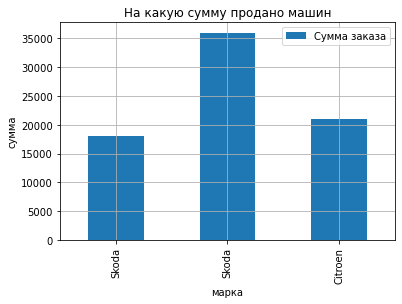

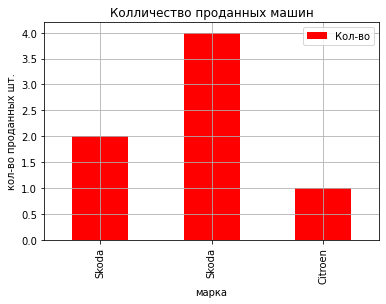

In [24]:
df.plot(
    x=1, y=7,
    kind="bar",
    title="На какую сумму продано машин",
    xlabel="марка",ylabel="сумма", grid=True
);
df.plot(
    x=1, y=5,
    kind="bar",
    title="Колличество проданных машин",
    xlabel="марка", ylabel="кол-во проданных шт.",
    color="red", grid=True
);

Рис. 2 (А и Б). Данные о проданных автомобилях

Как видим, из–за специфики кода у нас по-прежнему два автомобиля `Skoda` и они не сгруппированы. Главная цель всех текущих действий – получить метрики по продаже конкретных марок машин, а для этого все же необходимо группировать результаты.

##### Оператор GROUP BY

При помощи `SQL` оператора `GROUP BY` производится указание по каким полям необходимо произвести группировку. Произведем группировку по полю `id` машины. При помощи кода ниже мы получим графическое представление метрик «количество» и «выручка» по всем маркам проданных машин:

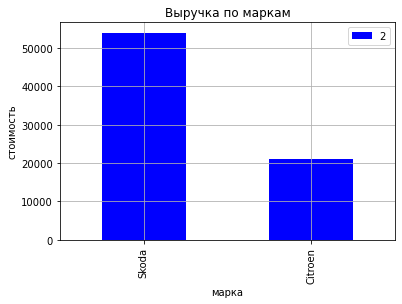

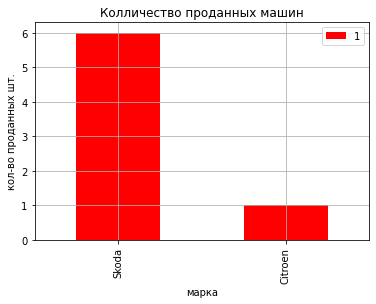

In [25]:
cursor.execute(" \
 SELECT \
 my_cars.name, SUM(orders.quantity) AS CarsCount, \
  SUM(orders.quantity * my_cars.price) as 'Сумма заказа' \
FROM \
  cars AS my_cars \
  LEFT JOIN orders ON orders.buyed_car_id = my_cars.id \
WHERE \
  orders.quantity * my_cars.price not null \
group by my_cars.id")

data = cursor.fetchall()
df = pd.DataFrame(data)
df.plot(
    x=0, y=2,
    kind="bar",
    title="Выручка по маркам",
    xlabel="марка", ylabel="стоимость",
    color="blue", grid=True,
);
df.plot(
    x=0, y=1,
    kind="bar",
    title="Колличество проданных машин",
    xlabel="марка", ylabel="кол-во проданных шт.",
    color="red", grid=True,
);

Рис. 3 (А и Б). Метрики о марках проданных автомобилях

При помощи оператора `GROUP BY` вы бы могли создать код (посредством доработки представленного кода), чтобы группировать все записи заказов с одинаковым `id` и тем самым сформировать единый для пользователя заказ. И тогда бы вы увидели, что покупатель в одном заказе заказал разные машины. Но в наших данных таких ситуаций нет, поэтому можете поэкспериментировать самостоятельно.

#### Типы данных (полей) в SQLite

`SQLite` поддерживает следующие типы данных, хранимые в ячейках таблиц:

-   `NULL` – пустое значение;

-   `INTEGER` – целочисленное со знаком (допустимые значения от -2^63 до +2^63). Хранится в 1, 2, 3, 4, 6, или 8 байтах в зависимости от величины числа.

-   `REAL` – число с плавающей точкой, хранится как 8 байт в формате `IEEE`;

-   `TEXT` – текстовая строка, хранимая в соответствии с настроенной кодировкой базы данных (`UTF-8`, `UTF-16BE` или `UTF-16LE`);

-   `BLOB` – это блок данных, хранящийся точно в том виде, в котором он был введен. Так называемые, бинарные данные.

Используя тип `BLOB` вы можете записать в базу данных любые файлы: картинки, песни, `Exel` документы или что угодно (допустимого размера). Максимальный допустимый размер от 1 Гб до 2.1 Гб в зависимости от настроек `SQLite`.

Пример ниже «прочитает» картинку `Chrysanthemum50.jpg`, которую необходимо расположить рядом с этим `Jupyter` блокнотом, и запишет её в БД, а затем прочитает (её из БД) и выведет. Обратите внимание, что код ниже использует то же соединение, что и код выше – т.е. ту же базу данных и создаст в ней таблицу `cars_img`, в поля которой запишет саму картинку и некоторые метаданные о ней (её расширение, т.е. тип, и имя)

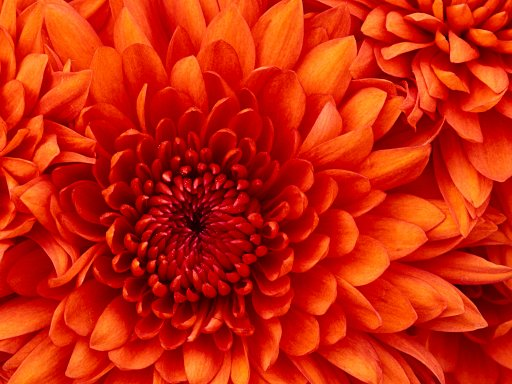

In [26]:
import os
import os.path
from os import getcwd, listdir

from IPython.core.display import Image

cursor.execute("CREATE TABLE if not exists cars_img (ID INTEGER PRIMARY KEY AUTOINCREMENT, PICTURE BLOB, TYPE TEXT, FILE_NAME TEXT)")

def insert_picture(cursor, picture_file):
    with open(picture_file, "rb") as input_file:
        ablob = input_file.read()
        base = os.path.basename(picture_file)
        afile, ext = os.path.splitext(base)
        sql = """INSERT INTO cars_img
        (PICTURE, TYPE, FILE_NAME)
        VALUES(?, ?, ?);"""
        cursor.execute(sql, [sqlite3.Binary(ablob), ext, afile])
        cursor.commit()

picture_file = "Chrysanthemum50.jpg"
insert_picture(connection, picture_file)

def extract_picture(cursor, picture_id):
    sql = "SELECT PICTURE, TYPE, FILE_NAME FROM cars_img WHERE id = :id"
    param = {"id": picture_id}
    cursor.execute(sql, param)
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, "wb") as output_file:
        output_file.write(ablob)
    return filename

filename = extract_picture(cursor, 1)
Image(filename="./" + filename)

В завершение занятия закроем базу данных и удалим её, чтобы не засорять память компьютера:

In [27]:
connection.close()

import os
if os.path.isfile('test.db'): # если файл существует
    os.remove('test.db')

## Контрольные задания и вопросы

1.  СУБД `SQLite` – что такое, где применяется, ключевое отличия от `MySQL` или `PostegreSQL` (по информации из сети Интернет или других источников), какие есть типы хранимых данных.

2.  В контексте использования `SQLite` – приведите пример `Python` кода, при помощи которого создаются новые таблицы, а также пример `Python` кода, выполняющего запросы на языке `SQL`.

3.  Кратко опишите – что такое метрика, какие бывают и какими могут быть, приведите примеры.

4.  Опишите кратко последовательность получения метрики «выручка по маркам автомобилей» и вывод её в графическом виде.

5.  Попробуйте при помощи `SQL` реализовать запрос, который группирует вывод заказов по уникальному номеру заказа (по `id`). Т.е., например, чтобы можно было вывести сколько разных машин пользователь заказал одним заказом (записи в таблице заказа разные, но у них один `id` заказа). Кроме создания этого запроса убедитесь, что в таблице с заказами существуют заказы с одинаковым `id` (в таблице из занятия таких записей нет – добавьте).